In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../../src')))
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../../scripts')))

In [3]:
from utils import *
from plottings import *

## Merging the Two data sets

In [4]:
df_store = data_loader('../../data/cleaned_store_data.csv')
df_sales = data_loader('../../data/train.csv')

c:\Store-Sales-Forecast-ML\scripts\utils.py:32: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path)


In [5]:
df = pd.merge(df_store, df_sales, on='Store')

In [6]:
df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,No Promo,5,2015-07-31,5263,555,1,1,0,1
1,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,No Promo,4,2015-07-30,5020,546,1,1,0,1
2,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,No Promo,3,2015-07-29,4782,523,1,1,0,1
3,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,No Promo,2,2015-07-28,5011,560,1,1,0,1
4,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,No Promo,1,2015-07-27,6102,612,1,1,0,1


In [7]:
# save merged data
df.to_csv('../../data/merged_data.csv', index=False)

In [8]:
column_summary(df)

,col_name,col_dtype,num_of_nulls,num_of_non_nulls,num_of_distinct_values,distinct_values_counts
0,Store,int64,0,1017209,1115,"{1: 942, 726: 942, 708: 942, 709: 942, 713: 94..."
1,StoreType,object,0,1017209,4,"{'a': 551627, 'd': 312912, 'c': 136840, 'b': 1..."
2,Assortment,object,0,1017209,3,"{'a': 537445, 'c': 471470, 'b': 8294}"
3,CompetitionDistance,float64,0,1017209,655,"{250.0: 11120, 50.0: 7536, 350.0: 7536, 1200.0..."
4,CompetitionOpenSinceMonth,float64,0,1017209,12,"{9.0: 437602, 4.0: 87076, 11.0: 84455, 3.0: 63..."
5,CompetitionOpenSinceYear,float64,0,1017209,23,"{2013.0: 398774, 2012.0: 74299, 2014.0: 63732,..."
6,Promo2,int64,0,1017209,2,"{1: 509178, 0: 508031}"
7,Promo2SinceWeek,float64,0,1017209,25,"{0.0: 508031, 14.0: 72990, 40.0: 62598, 31.0: ..."
8,Promo2SinceYear,float64,0,1017209,8,"{0.0: 508031, 2011.0: 115056, 2013.0: 110464, ..."
9,PromoInterval,object,0,1017209,4,"{'No Promo': 508031, 'Jan,Apr,Jul,Oct': 293122..."


# Let's do the Analysis

## 1. Correlation between sales and the number of customers

In [9]:
np.corrcoef(df['Sales'], df['Customers'])

array([[1.        , 0.89471077],
       [0.89471077, 1.        ]])

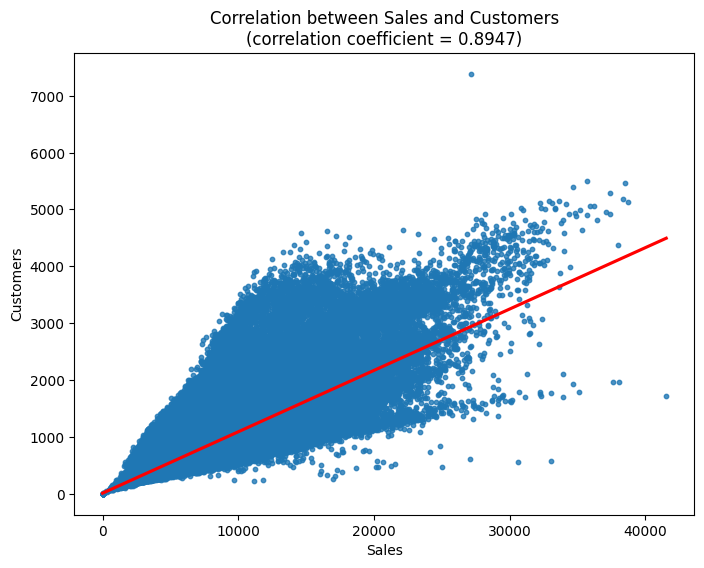

In [10]:
plot_correlation(df, 'Sales', 'Customers')

## Sales and Customers Comparison: Promo vs. No Promo

In [11]:
# Grouping data by 'Promo' and calculating the average sales
sales_by_promo = df.groupby('Promo')['Sales'].mean()

for promo, avg_sales in sales_by_promo.items():
    promo_status = "with Promotion" if promo == 1 else "without Promotion"
    print(f"Average Sales {promo_status}: {avg_sales:.2f}")

Average Sales without Promotion: 4406.05
Average Sales with Promotion: 7991.15


In [12]:
# Grouping data by 'Promo' and calculating the average number of customers
customers_by_promo = df.groupby('Promo')['Customers'].mean()

for promo, avg_customers in customers_by_promo.items():
    promo_status = "with Promotion" if promo == 1 else "without Promotion"
    print(f"Average Number of Customers {promo_status}: {avg_customers:.2f}")

Average Number of Customers without Promotion: 517.82
Average Number of Customers with Promotion: 820.10


### The effect of Promo on customer Acquisition

In [13]:
acquisition_analysis = df.groupby(['Promo'])['Customers'].agg(['count', 'sum']).reset_index()
acquisition_analysis.columns = ['Promo', 'New Customers Count', 'Total Customers']

# Calculate the percentage of new customers during promos and non-promos
acquisition_analysis['Percentage of New Customers'] = (acquisition_analysis['New Customers Count'] / acquisition_analysis['Total Customers']) * 100

# Display results
print("Customer Acquisition Analysis:")
print(acquisition_analysis)

Customer Acquisition Analysis:
   Promo  New Customers Count  Total Customers  Percentage of New Customers
0      0               629129        325777807                     0.193116
1      1               388080        318263948                     0.121937


### Visualizations

c:\Store-Sales-Forecast-ML\scripts\plottings.py:132: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Promo', y='Sales', data=sales_by_promo, palette='Blues')


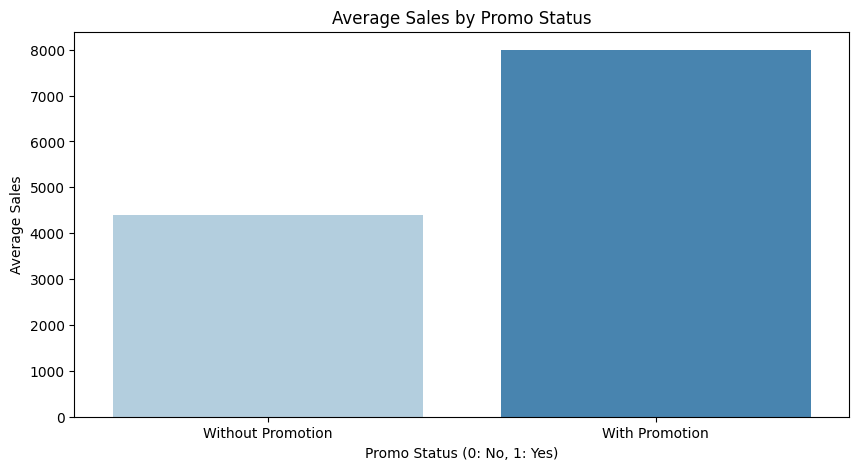

c:\Store-Sales-Forecast-ML\scripts\plottings.py:141: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Promo', y='Customers', data=customers_by_promo, palette='Greens')


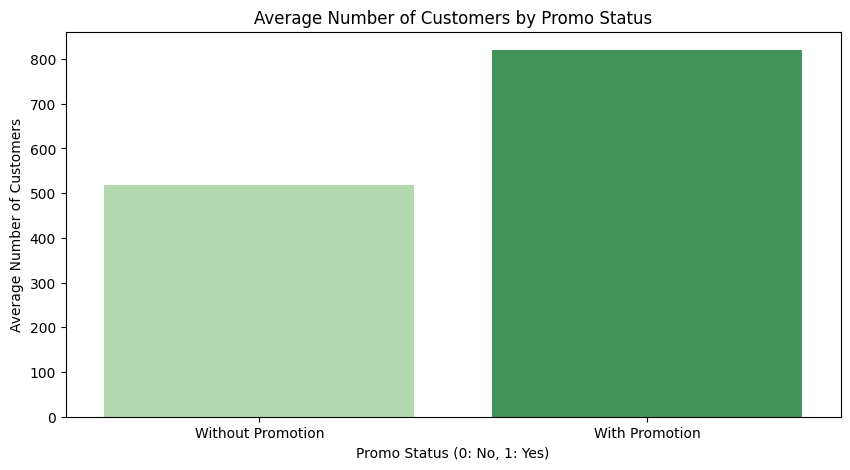

c:\Store-Sales-Forecast-ML\scripts\plottings.py:151: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Promo', y='Sales_per_Customer', data=sales_per_customer_by_promo, palette='Reds')


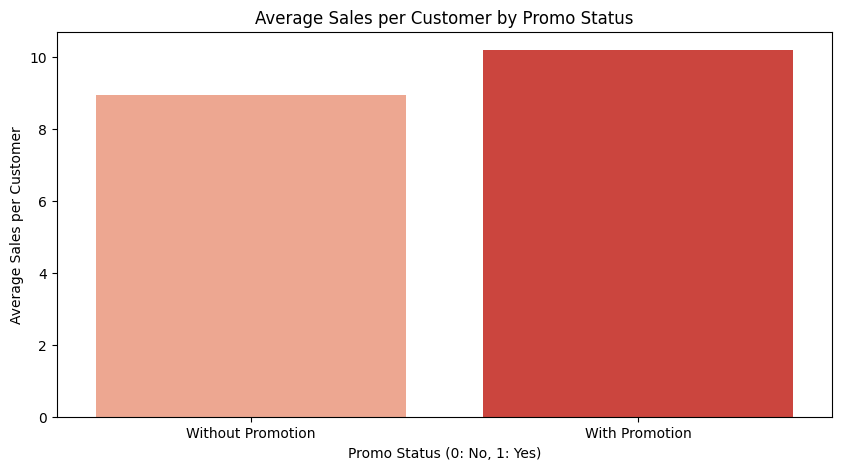

In [14]:
visualize_promo_effects(df)

## Effectiveness of Promo deployment

### Top 10 Most Effective Promo Stores with sales lift

In [15]:
# 1. Sales lift analysis by Store
sales_lift = df.groupby(['Store', 'Promo'])['Sales'].mean().unstack()
sales_lift['Sales Lift'] = sales_lift[1] - sales_lift[0]

# 2. Average Customers by Store
customers_by_store = df.groupby(['Store', 'Promo'])['Customers'].mean().unstack()

# 3. Identify stores where promos are most effective
threshold_value = 10
effective_stores = sales_lift[sales_lift['Sales Lift'] > threshold_value]

# 4. Get the top 10 stores with the highest sales lift
top_10_effective_stores = effective_stores.nlargest(10, 'Sales Lift')

# Display the results
print("Top Ten Stores with Effective Promotions:")
print(top_10_effective_stores)


Top Ten Stores with Effective Promotions:
Promo             0             1    Sales Lift
Store                                          
817    14043.338488  24679.566667  10636.228179
261     6694.369416  16478.113889   9783.744473
544     8329.314433  17072.355556   8743.041123
1014    6853.450172  15334.427778   8480.977606
963     5758.707904  13982.883333   8224.175430
788    11869.646048  19927.797222   8058.151174
335    10306.773196  18175.525000   7868.751804
251    12810.092784  20670.544444   7860.451661
513    12155.924399  19937.938889   7782.014490
831     7541.963918  15264.750000   7722.786082


## Trends of customer behavior during store opening and closing times

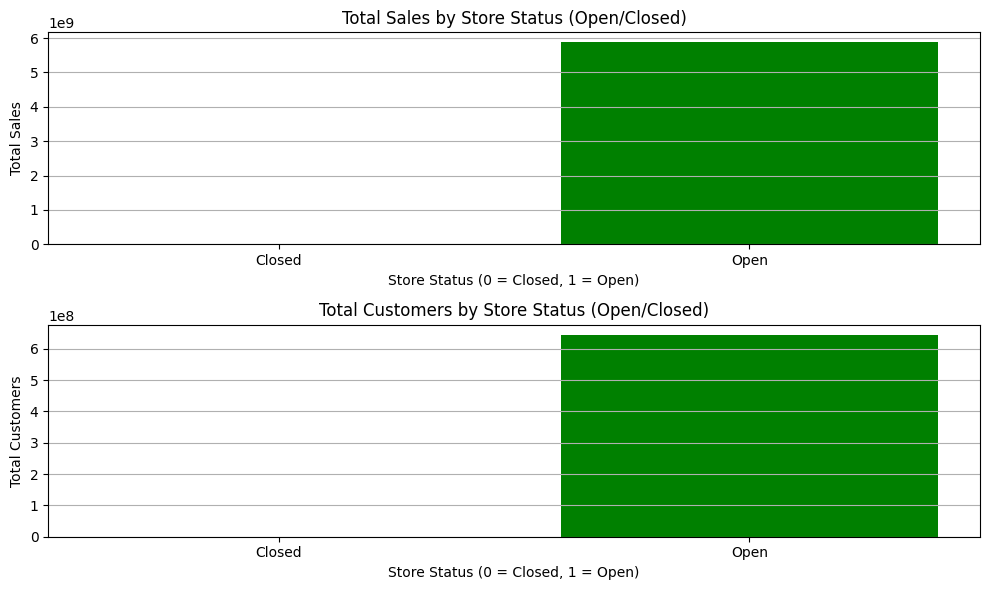

Sales and Customers Summary:
   Open       Sales  Customers
0     0           0          0
1     1  5873180623  644041755


In [16]:
summary = analyze_customer_behavior(df)
print("Sales and Customers Summary:")
print(summary)

## The Effect of Assortment Type on Sales

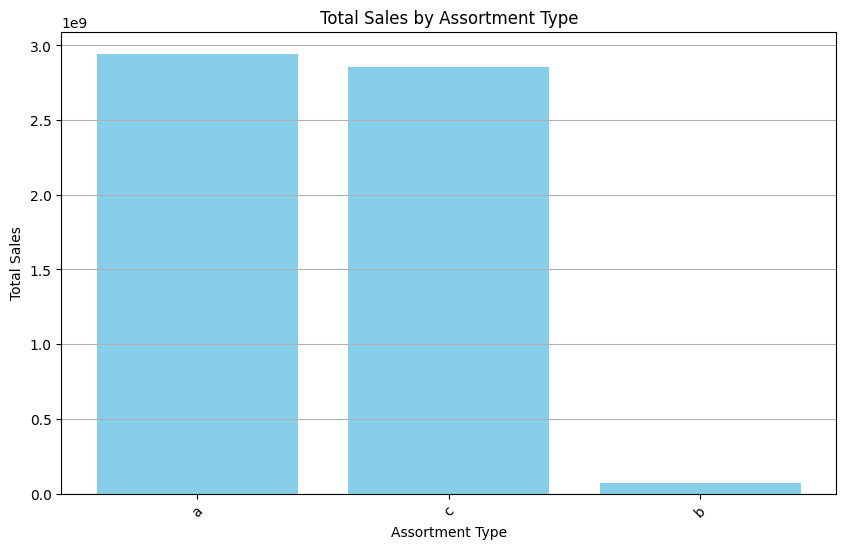

Sales Summary by Assortment Type:
  Assortment       Sales
0          a  2945750070
2          c  2856484241
1          b    70946312


In [17]:
assortment_summary = analyze_assortment_effect_on_sales(df)
print("Sales Summary by Assortment Type:")
print(assortment_summary)

## The Effect of Competition Distance on Sales

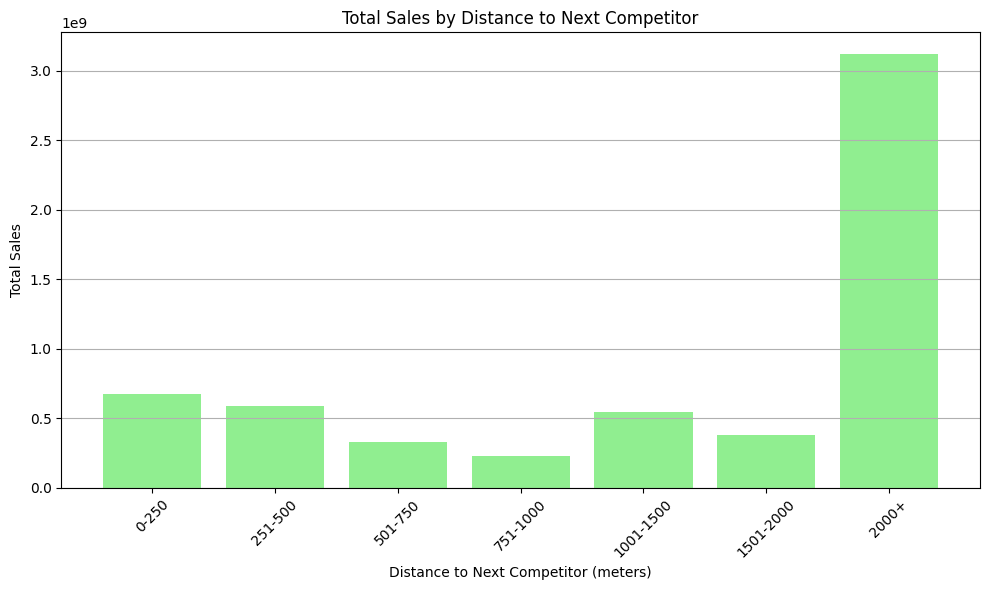

Sales Summary by Competition Distance:
None


In [18]:
competition_distance_summary = analyze_competition_distance_effect_on_sales(df)
print("Sales Summary by Competition Distance:")
print(competition_distance_summary)

### Correlation between Sales and Competition Distance

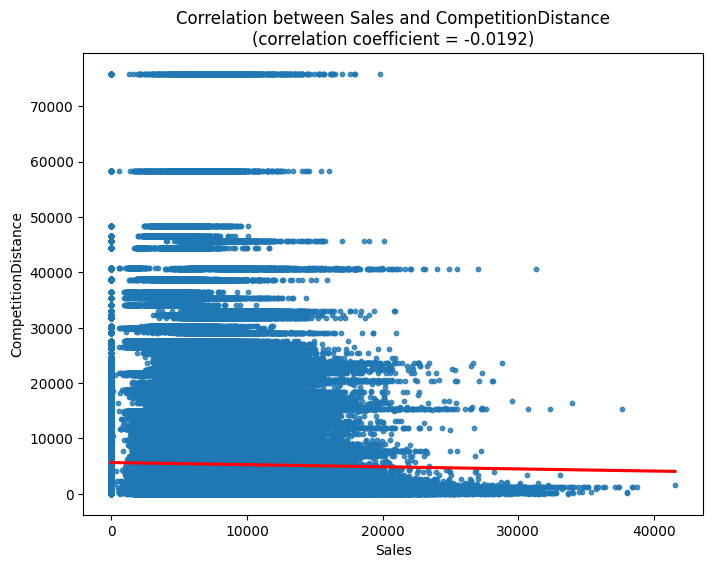

In [19]:
plot_correlation(df, 'Sales', 'CompetitionDistance')